In [2]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.spatial import Voronoi, voronoi_plot_2d

np.set_printoptions(suppress=True)

In [3]:
mnist_train = torchvision.datasets.MNIST('./data', train=True, download=True)
mnist_test = torchvision.datasets.MNIST('./data', train=False, download=True)



data = mnist_train.data.numpy()
number_img = len(data)
num_pixels = data.shape[1] * data.shape[2]
d2_data = np.reshape(data, (number_img, num_pixels))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
def show_scatter_data(X,title=''):
    fig = go.Figure(data=[go.Scatter(x=X[0,:],y=X[1,:],mode="markers",name='Datapoints')])
    fig.update_layout(title=title,title_x=0.5,
                      xaxis_title="component 1",
                      yaxis_title="component 2",
                      yaxis=dict(scaleanchor="x", scaleratio=1))
    fig.show()

In [5]:
def poly_kernel(xi,xj,d):
    return (1+xi.T@xj)**d

def rbf_kernel(xi,xj,sigma):
    return np.exp(-((xi-xj).T)@(xi-xj)/(2*sigma*sigma))

def get_kernel_components_poly(X,d,num_components=2):
    '''It returns the components using polynomial kernel'''
    n = X.shape[1]
    one_N = np.ones((n,n))/n
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            xi = X[:,i]
            xj = X[:,j]
            K[i,j] = poly_kernel(xi,xj,d)

    Kc = K - one_N@K - K@one_N + one_N@K@one_N
    w,V = np.linalg.eig(Kc)
    w=w.real #imaginary part is negligible and real symmetric matrices have only real eigen values
    V = V.real
    alphak = V[:,np.flip(w.argsort())]
    alphak = alphak/((np.abs(w))**0.5)
    kernel_comps = (Kc.T@(alphak[:,0:num_components])).T

    return kernel_comps

def get_kernel_components_rbf(X,sigma,num_components=2):
    '''It returns the components using rbf kernel'''
    n = X.shape[1]
    one_N = np.ones((n,n))/n
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            xi = X[:,i]
            xj = X[:,j]
            K[i,j] = rbf_kernel(xi,xj,sigma)

    Kc = K - one_N@K - K@one_N + one_N@K@one_N
    w,V = np.linalg.eig(Kc)
    w=w.real #imaginary part is negligible and real symmetric matrices have only real eigen values
    V = V.real
    alphak = V[:,np.flip(w.argsort())]
    alphak = alphak/((np.abs(w))**0.5)
    kernel_comps = (Kc.T@(alphak[:,0:num_components])).T

    return kernel_comps

###Kernel A: Polynomial Kernel

In [6]:
# Define the size of the subset
subset_size = 500

# Select a random subset of the data
subset_indices = np.random.choice(number_img, subset_size, replace=False)
subset_data = d2_data[subset_indices]

In [7]:
kernel_comps = get_kernel_components_poly(subset_data,d=2,num_components=2)
show_scatter_data(kernel_comps,title="Kernel PCA with Polynomial Kernel of d = 2 ")

d=3

In [8]:
kernel_comps = get_kernel_components_poly(subset_data,d=3,num_components=2)
show_scatter_data(kernel_comps,title="Kernel PCA with Polynomial Kernel of d = 3")

d=4

In [9]:
kernel_comps = get_kernel_components_poly(subset_data,d=4,num_components=2)
show_scatter_data(kernel_comps,title="Kernel PCA with Polynomial Kernel of d = 4")

#### **Kernel B: Radial Basis Function Kernel**

In [20]:
data_fixed = np.nan_to_num(subset_data)
data_fixed[np.isinf(data_fixed)] = 1e10
data1 = data_fixed

In [22]:
data_fixed = np.nan_to_num(subset_data)
max_val = np.max(subset_data[np.isfinite(subset_data)])  # Get the maximum finite value in subset_data
data_fixed[np.isinf(data_fixed)] = max_val  # Replace infinite values with max_val


X axis: Component 1 obtained by kernel PCA
Y axis: Component 2 obtained by kernel PCA


<ipython-input-5-bba828860a00>:5: RuntimeWarning:

overflow encountered in exp

<ipython-input-5-bba828860a00>:39: RuntimeWarning:

invalid value encountered in subtract

<ipython-input-5-bba828860a00>:39: RuntimeWarning:

invalid value encountered in add



LinAlgError: ignored

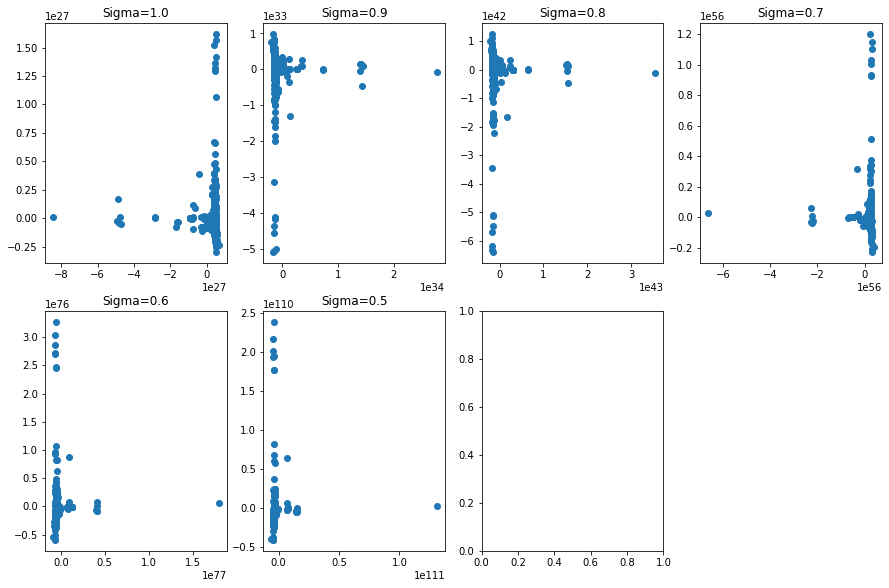

In [25]:
plt.figure(figsize=(15,15))
i=1

print("X axis: Component 1 obtained by kernel PCA")
print("Y axis: Component 2 obtained by kernel PCA")
for sigma in np.linspace(1,0.1,10):
    plt.subplot(3,4,i)
    sigma = round(sigma,2)
    kernel_comps = get_kernel_components_rbf(data_fixed,sigma,num_components=2)
    plt.scatter(kernel_comps[0],kernel_comps[1])
    plt.title("Sigma={}".format(sigma))
    i+=1

X axis: Component 1 obtained by kernel PCA
Y axis: Component 2 obtained by kernel PCA


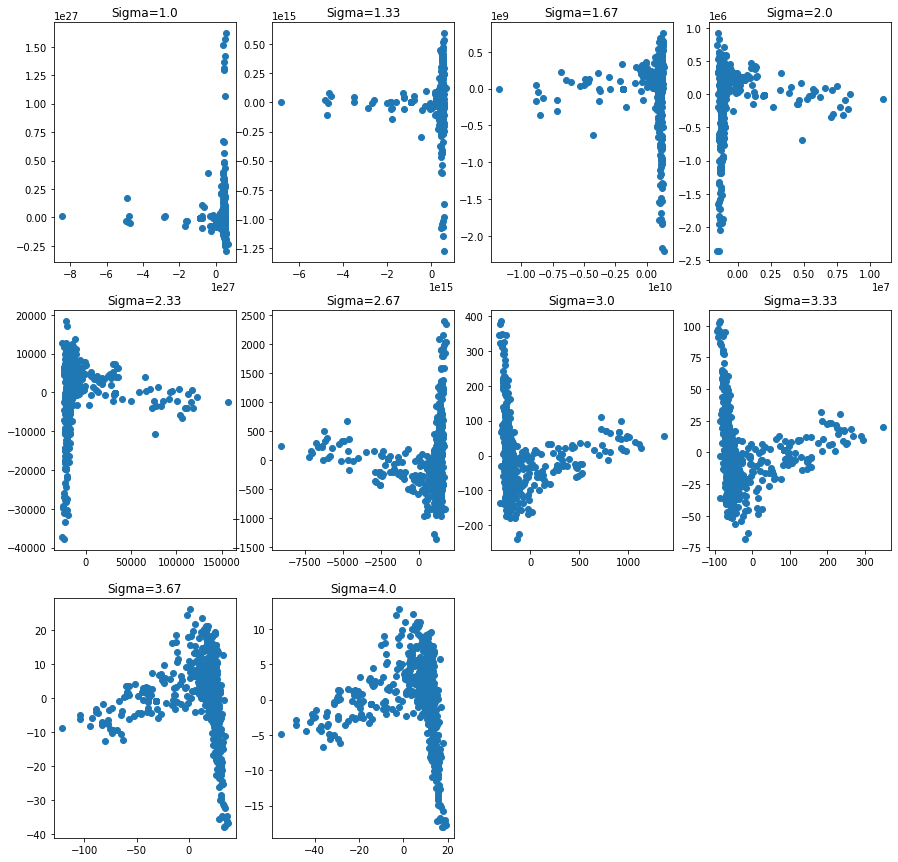

In [26]:
plt.figure(figsize=(15,15))
i=1

print("X axis: Component 1 obtained by kernel PCA")
print("Y axis: Component 2 obtained by kernel PCA")
for sigma in np.linspace(1,4,10):
    plt.subplot(3,4,i)
    sigma = round(sigma,2)
    kernel_comps = get_kernel_components_rbf(data_fixed,sigma,num_components=2)
    plt.scatter(kernel_comps[0],kernel_comps[1])
    plt.title("Sigma={}".format(sigma))
    i+=1

Q1(4) : Based on the images of the plots, Redial kernel function is best for this data set